In [113]:
import numpy as np
from scipy.special import softmax, expit
import matplotlib.pyplot as plt     

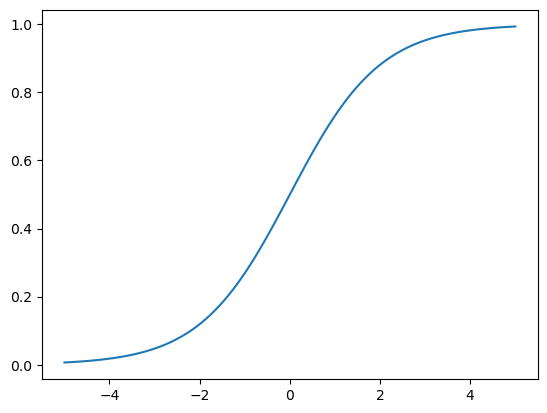

In [114]:
x = np.linspace(-5,5,100)

plt.plot(x,expit(x))

In [115]:
def run_unit(X,g,r):
    Y = softmax(X,axis=1) * expit(5 * g[:,np.newaxis])
    T = X.shape[0]
    D = X.shape[1]

    M = -np.ones((D,D))
    np.fill_diagonal(M,1)

    thresh = 0.5;
    nl = 20

    Z = np.zeros_like(Y)
    L = np.zeros_like(Y)
    Z[0,0] = 1
    for tt in range(1,T):
        L[tt,:] = M @ Z[tt-1,:] + Y[tt,:] - r[tt-1]
        Z[tt,:] = expit(nl * (L[tt,:] - thresh))
    return Z,Y,L


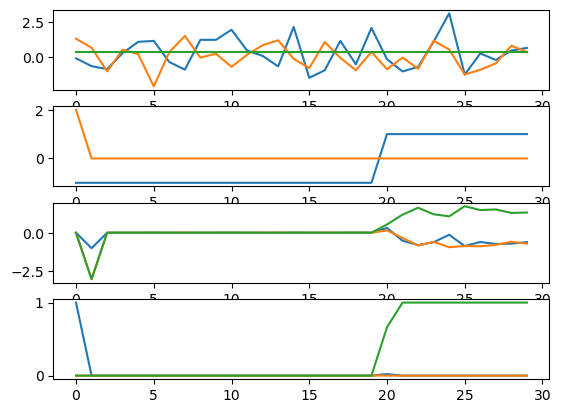

In [119]:
A = np.random.randn(30,3)
A[:,0] += 0.1
A[:,-1] = 0.4
g = np.zeros((30))
g[:20] = -1
g[20:] = 1

r = np.zeros(30)
r[:1] = 2

Z,Y,L = run_unit(A,g,r)

plt.subplot(4,1,1)
plt.plot(A)
plt.subplot(4,1,2)
plt.plot(g)
plt.plot(r)
plt.subplot(4,1,3)
plt.plot(L)
plt.subplot(4,1,4)
plt.plot(Z)